# Języki Programowania Python i R


## dr inż. Patryk Jasik
### Division of Theoretical Physics and Quantum Information
### Institute of Physics and Computer Science
### Faculty of Applied Physics and Mathematics
### Gdansk University of Technology

In [1]:
#ładowanie bibliotek
from pandas import read_csv
from pandas import datetime
import random as rnd

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_137/1879283269.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
#ustawienia wykresów i wyświetlanie liczb zmiennoprzecinkowych
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rc('figure', figsize=(8, 5))
np.set_printoptions(precision=8, suppress=True)

In [3]:
#tworzymy funkcję, która będzie interpretowała daty w zadany przez nas sposób
def parser(x):
    return datetime.strptime('202'+x, '%Y-%m')

In [4]:
#wczytujemy plik z danymi
series = read_csv('dane/shampoo-sales.csv',
                  header=0,
                  index_col=0,
                  parse_dates=True,
                  squeeze=True,
                  date_parser=parser)
series

/tmp/ipykernel_137/2185754699.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/shampoo-sales.csv',


Month
2021-01-01    266.0
2021-02-01    145.9
2021-03-01    183.1
2021-04-01    119.3
2021-05-01    180.3
2021-06-01    168.5
2021-07-01    231.8
2021-08-01    224.5
2021-09-01    192.8
2021-10-01    122.9
2021-11-01    336.5
2021-12-01    185.9
2022-01-01    194.3
2022-02-01    149.5
2022-03-01    210.1
2022-04-01    273.3
2022-05-01    191.4
2022-06-01    287.0
2022-07-01    226.0
2022-08-01    303.6
2022-09-01    289.9
2022-10-01    421.6
2022-11-01    264.5
2022-12-01    342.3
2023-01-01    339.7
2023-02-01    440.4
2023-03-01    315.9
2023-04-01    439.3
2023-05-01    401.3
2023-06-01    437.4
2023-07-01    575.5
2023-08-01    407.6
2023-09-01    682.0
2023-10-01    475.3
2023-11-01    581.3
2023-12-01    646.9
Name: Sales, dtype: float64

In [5]:
series['2022']

Month
2022-01-01    194.3
2022-02-01    149.5
2022-03-01    210.1
2022-04-01    273.3
2022-05-01    191.4
2022-06-01    287.0
2022-07-01    226.0
2022-08-01    303.6
2022-09-01    289.9
2022-10-01    421.6
2022-11-01    264.5
2022-12-01    342.3
Name: Sales, dtype: float64

In [7]:
series['2021-01']

Month
2021-01-01    266.0
Name: Sales, dtype: float64

In [6]:
type(series)

pandas.core.series.Series

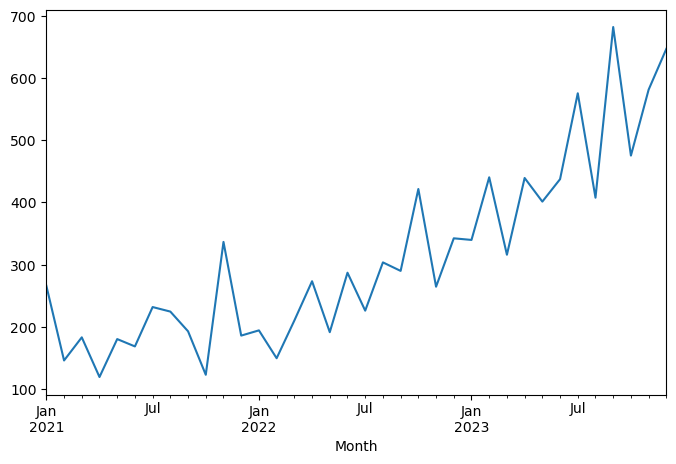

In [9]:
series.plot()
plt.show()

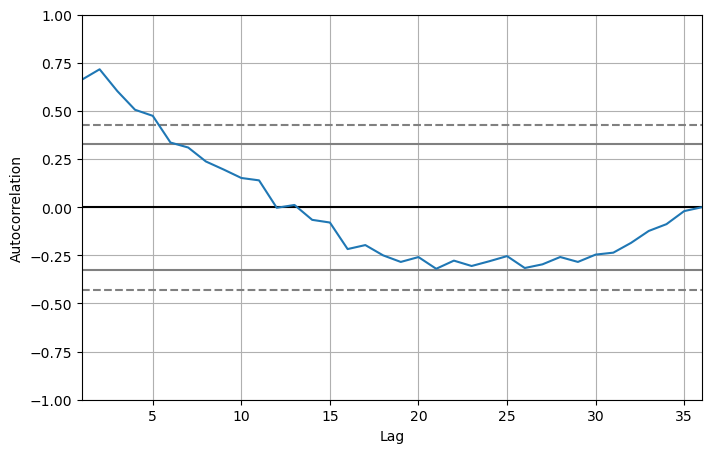

In [10]:
# funkcja autokorelacji
pd.plotting.autocorrelation_plot(series)
plt.show()

In [11]:
#dokonujemy zmiany próbkowania szergu (upsample -> z miesięcy na dni)
upsampled = series.resample('D').mean()
print(upsampled.head(32))

Month
2021-01-01    266.0
2021-01-02      NaN
2021-01-03      NaN
2021-01-04      NaN
2021-01-05      NaN
2021-01-06      NaN
2021-01-07      NaN
2021-01-08      NaN
2021-01-09      NaN
2021-01-10      NaN
2021-01-11      NaN
2021-01-12      NaN
2021-01-13      NaN
2021-01-14      NaN
2021-01-15      NaN
2021-01-16      NaN
2021-01-17      NaN
2021-01-18      NaN
2021-01-19      NaN
2021-01-20      NaN
2021-01-21      NaN
2021-01-22      NaN
2021-01-23      NaN
2021-01-24      NaN
2021-01-25      NaN
2021-01-26      NaN
2021-01-27      NaN
2021-01-28      NaN
2021-01-29      NaN
2021-01-30      NaN
2021-01-31      NaN
2021-02-01    145.9
Freq: D, Name: Sales, dtype: float64


In [20]:
#do wypełnienia pustych wartości wykorzystujemy różne rodzaje interpolacji
#interpolated = upsampled.interpolate(method='linear')
interpolated = upsampled.interpolate(method='spline', order=2)
print(interpolated.head(32))

Month
2021-01-01    266.000000
2021-01-02    258.630160
2021-01-03    251.560886
2021-01-04    244.720748
2021-01-05    238.109746
2021-01-06    231.727880
2021-01-07    225.575149
2021-01-08    219.651553
2021-01-09    213.957094
2021-01-10    208.491770
2021-01-11    203.255582
2021-01-12    198.248529
2021-01-13    193.470612
2021-01-14    188.921831
2021-01-15    184.602185
2021-01-16    180.511676
2021-01-17    176.650301
2021-01-18    173.018063
2021-01-19    169.614960
2021-01-20    166.440993
2021-01-21    163.496161
2021-01-22    160.780465
2021-01-23    158.293905
2021-01-24    156.036481
2021-01-25    154.008192
2021-01-26    152.209039
2021-01-27    150.639021
2021-01-28    149.298139
2021-01-29    148.186393
2021-01-30    147.303783
2021-01-31    146.650308
2021-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


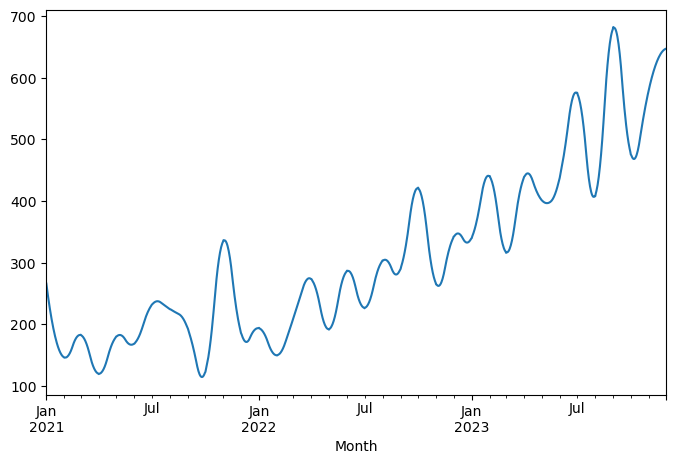

In [21]:
interpolated.plot()
plt.show()

In [19]:
#możemy również zmniejszyć częstotliwość próbkowania szergu (downsample -> z miesięcy na kwartały lub lata)
resample = series.resample('Q')
#resample = series.resample('A')
resample


In [26]:
#dla kwartałów wyznaczamy średnią, natomiast dla lat sumujemy dane
quarterly_mean_sales = resample.mean()
yearly_sum_sales = resample.sum()
quarterly_mean_sales.head()
yearly_sum_sales

Month
2021-03-31     595.0
2021-06-30     468.1
2021-09-30     649.1
2021-12-31     645.3
2022-03-31     553.9
2022-06-30     751.7
2022-09-30     819.5
2022-12-31    1028.4
2023-03-31    1096.0
2023-06-30    1278.0
2023-09-30    1665.1
2023-12-31    1703.5
Freq: Q-DEC, Name: Sales, dtype: float64

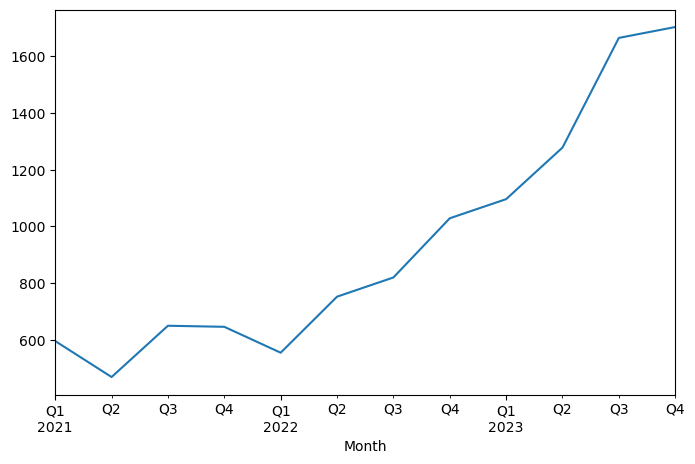

In [24]:
yearly_sum_sales.plot()
plt.show()

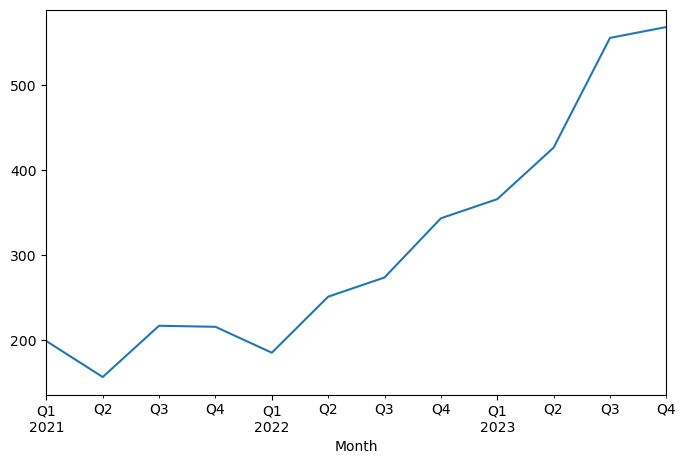

In [27]:
quarterly_mean_sales.plot()
plt.show()

/tmp/ipykernel_137/1012859085.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/airline-passengers.csv',


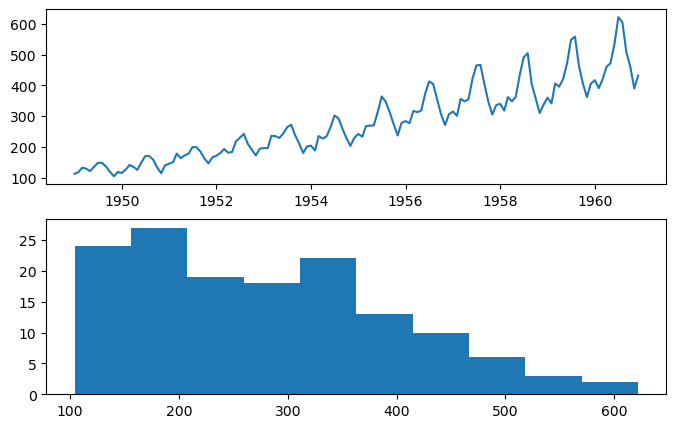

In [28]:
#transformacje szeregów czasowych w celu redukcji szumów i poprawieniu jakości sygnału
#Wczytanie danych
series = read_csv('dane/airline-passengers.csv',
                  header=0,
                  index_col=0,
                  parse_dates=True, squeeze=True)
plt.figure(1)
# linia
plt.subplot(211)
plt.plot(series)
# histogram
plt.subplot(212)
plt.hist(series)
plt.show()

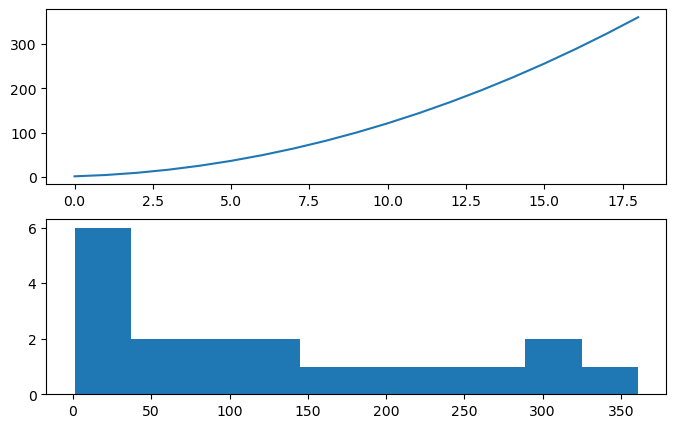

In [30]:
#przykład 1: trend zmienia się jak funkcja kwadratowa
series = [i**2 for i in range(1,20)]
plt.figure(1)
# linia
plt.subplot(211)
plt.plot(series)
# histogram
plt.subplot(212)
plt.hist(series)
plt.show()

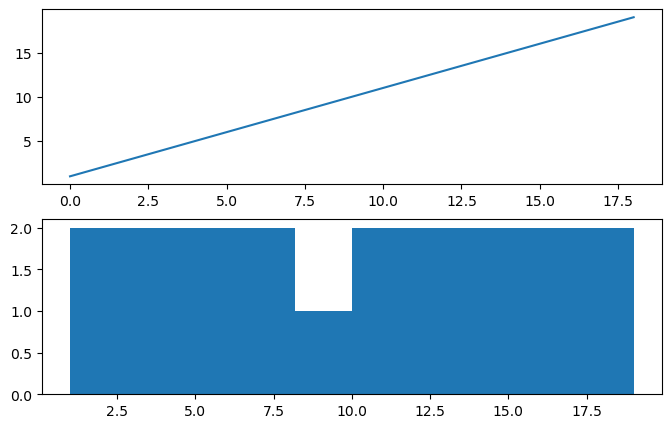

In [31]:
#Przykład 1
series = [i**2 for i in range(1,20)]
#usunięcie trendu polega na spierwiastkowaniu szeregu
transform = np.sqrt(series)
plt.figure(1)
# linia
plt.subplot(211)
plt.plot(transform)
# histogram
plt.subplot(212)
plt.hist(transform)
plt.show()

/tmp/ipykernel_137/82065740.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/airline-passengers.csv',


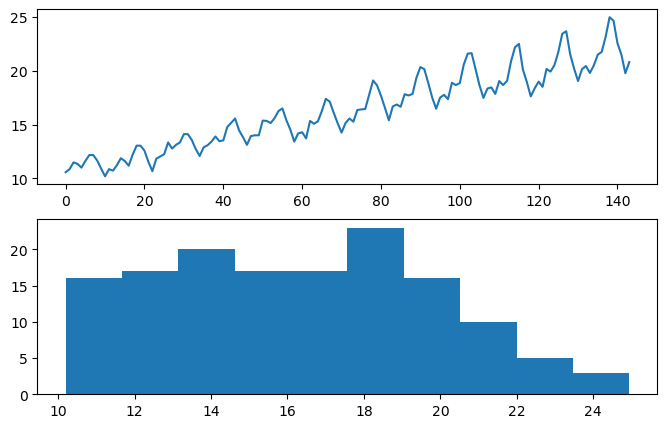

In [34]:
#poprzez pierwiastkowanie próbujemy zmienić trend na liniowy, a rozkład na jednostajny
series = read_csv('dane/airline-passengers.csv',
                  header=0,
                  index_col=0,
                  parse_dates=True, squeeze=True)

dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = np.sqrt(dataframe['passengers'])

plt.figure(1)
# linia
plt.subplot(211)
plt.plot(dataframe['passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['passengers'])
plt.show()

/tmp/ipykernel_137/2739205954.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


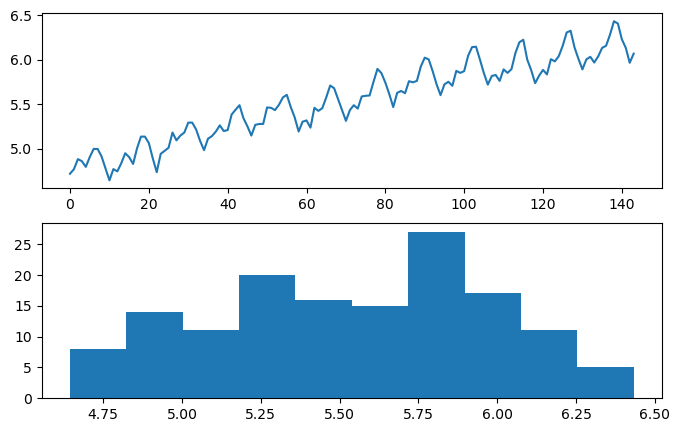

In [33]:
#jeżeli jednak trend rośnie wykładniczo możemy zlogarytmować szereg
series = read_csv('dane/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = np.log(dataframe['passengers'])

plt.figure(1)
# linia
plt.subplot(211)
plt.plot(dataframe['passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['passengers'])
plt.show()

/tmp/ipykernel_137/3567787236.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


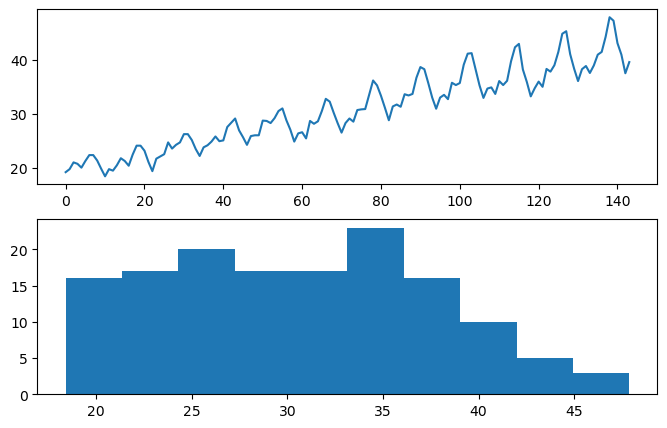

In [35]:
# transformacja Box-Cox jest transformacją parametryczną, w której sterujemy parametrem lambda
#w zależności od wartości tego parametru otrzymujemy różne przekształcenia szeregów
#np. lambda = 0.0 logarytmowanie, lambda = 0.5 pierwiastkowanie, lambda = 1.0 brak transformacji
from scipy.stats import boxcox

series = read_csv('dane/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.5)

plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(dataframe['passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['passengers'])
plt.show()

/tmp/ipykernel_137/2467080349.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


Lambda: 0.148023


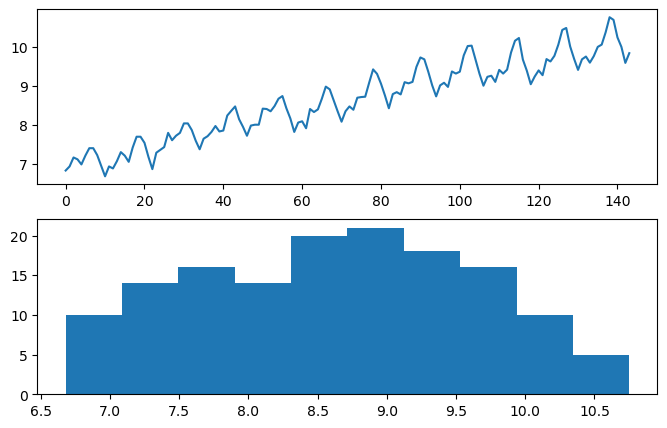

In [36]:
#możemy również automatycznie wyznaczyć najlepszy parametr lambda dla rozważanego szeregu
series = read_csv('dane/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'], lam = boxcox(dataframe['passengers'])

print('Lambda: %f' % lam)

plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(dataframe['passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['passengers'])
plt.show()

In [37]:
# zastosowanie średniej kroczącej w celu przygotowania danych
#wczytanie danych
series = read_csv('dane/daily-total-female-births.csv',
                  header=0,
                  index_col=0, parse_dates=True, squeeze=True)

/tmp/ipykernel_137/2567792513.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/daily-total-female-births.csv',


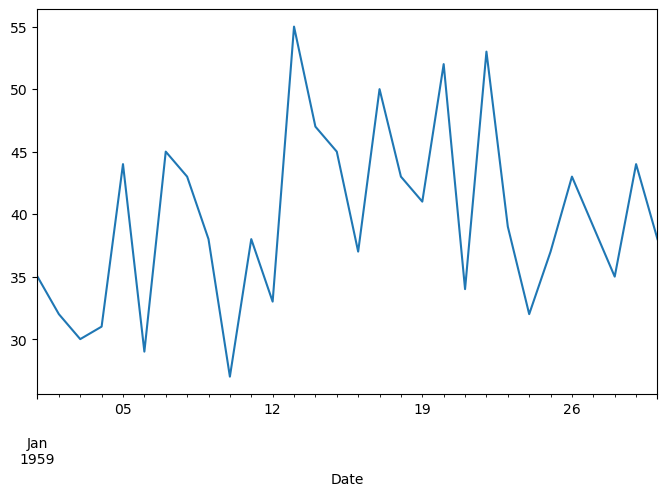

In [40]:
series[:30].plot()
plt.show()

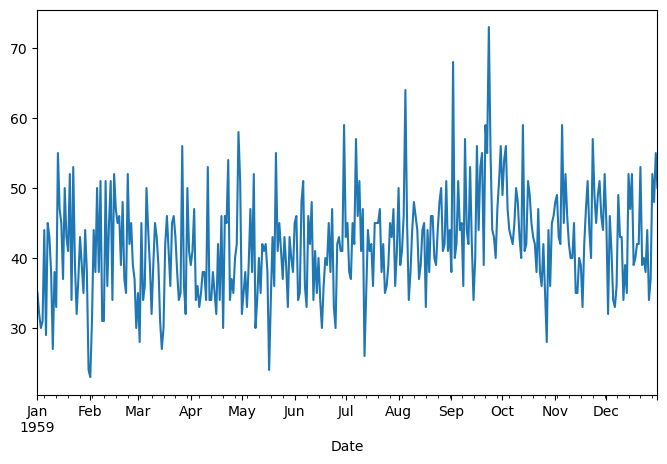

In [43]:
series.plot()
plt.show()

In [39]:
series.head(10)

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
Name: Births, dtype: int64

In [56]:
# wyznaczenie wartości średniej dla trzech wartości t-2, t-1 i t
rolling = series.rolling(window=7)
print(rolling)


Rolling [window=7,center=False,axis=0,method=single]


In [57]:
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04          NaN
1959-01-05          NaN
1959-01-06          NaN
1959-01-07    35.142857
1959-01-08    36.285714
1959-01-09    37.142857
1959-01-10    36.714286
Name: Births, dtype: float64


In [58]:
rolling_mean.tail(10)

Date
1959-12-22    43.857143
1959-12-23    42.142857
1959-12-24    42.000000
1959-12-25    42.571429
1959-12-26    41.428571
1959-12-27    40.714286
1959-12-28    40.571429
1959-12-29    41.857143
1959-12-30    44.000000
1959-12-31    45.714286
Name: Births, dtype: float64

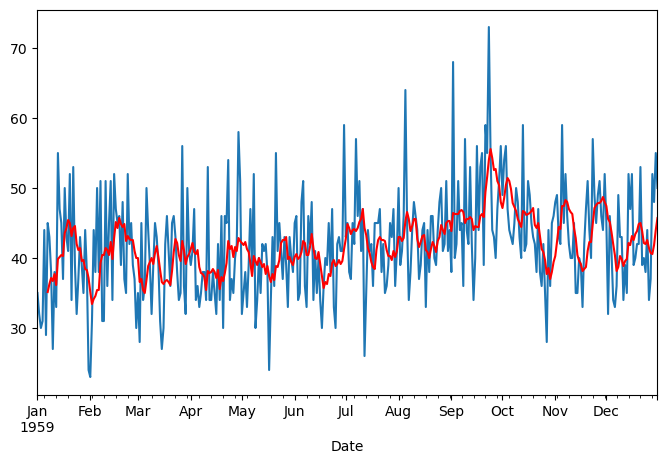

In [59]:
#wykres danych oryginalnych i po zastosowaniu średniej kroczącej
series.plot()
rolling_mean.plot(color='red')
plt.show()

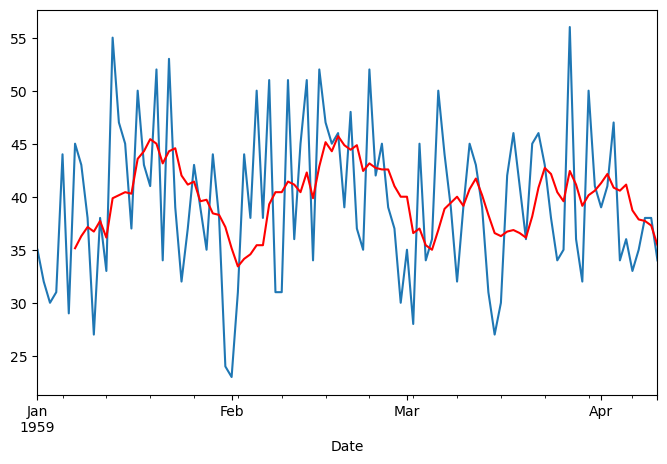

In [60]:
# wykres części danych oryginalnych i po zastosowaniu średniej kroczącej
series[:100].plot()
rolling_mean[:100].plot(color='red')
plt.show()

In [61]:
# średnia krocząca w celu tworzenia
# nowych cech szeregu (feature engineering)

#wczytanie danych
series = read_csv('dane/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df = pd.DataFrame(series.values)



/tmp/ipykernel_137/1771055560.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [62]:
df

,0
0,35
1,32
2,30
3,31
4,44
...,...
360,37
361,52
362,48
363,55


In [63]:
df.shift(1)

,0
0,NaN
1,35.0
2,32.0
3,30.0
4,31.0
...,...
360,34.0
361,37.0
362,52.0
363,48.0


In [64]:
df.shift(-1)

,0
0,32.0
1,30.0
2,31.0
3,44.0
4,29.0
...,...
360,52.0
361,48.0
362,55.0
363,50.0


In [65]:
width = 4 #szerokość okna

lag1 = df.shift(2) #przesunięcie oryginalnego szeregu o jeden krok czasowy
lag3 = df.shift(width - 1) #przesunięcie oryginalnego szeregu o krok czasowy zależny od rozmiaru okna
window = lag3.rolling(window=width) 
means = window.mean() #wyznaczenie średniej kroczącej

dataframe = pd.concat([means, lag1, df], axis=1) #połączenie kolumn w jedną ramkę danych
dataframe.columns = ['mean', 't', 't+1']
dataframe.head(20)

,mean,t,t+1
0,NaN,NaN,35
1,NaN,NaN,32
2,NaN,35.0,30
3,NaN,32.0,31
4,NaN,30.0,44
5,NaN,31.0,29
6,32.00,44.0,45
7,34.25,29.0,43
8,33.50,45.0,38
9,37.25,43.0,27


In [71]:
#średnia krocząca jako naiwny podel predykcyjny
from sklearn.metrics import mean_squared_error

series = read_csv('dane/daily-total-female-births.csv',
                  header=0,
                  index_col=0, parse_dates=True, squeeze=True)

# przygotowanie zmiennych
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# wyznaczanie średniej kroczącej w celu obliczenia przyszłych wartości szeregu czasowego
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = mean_squared_error(test, predictions, squared=False)
print('Test RMSE: %.3f' % rmse)

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


/tmp/ipykernel_137/233797212.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/daily-total-female-births.csv',


In [72]:
series = read_csv('dane/daily-total-female-births.csv',
                  header=0,
                  index_col=0, parse_dates=True, squeeze=True)

# przygotowanie zmiennych
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# wyznaczanie średniej kroczącej w celu obliczenia przyszłych wartości szeregu czasowego
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = mean_squared_error(test, predictions, squared=False)
print('Test RMSE: %.3f' % rmse)

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


/tmp/ipykernel_137/4205851884.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/daily-total-female-births.csv',


In [73]:
series = read_csv('dane/daily-total-female-births.csv',
                  header=0,
                  index_col=0, parse_dates=True, squeeze=True)

# przygotowanie zmiennych
X = series.values
window = 1
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# wyznaczanie średniej kroczącej w celu obliczenia przyszłych wartości szeregu czasowego
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = mean_squared_error(test, predictions, squared=False)
print('Test RMSE: %.3f' % rmse)

predicted=35.000000, expected=32.000000
predicted=32.000000, expected=30.000000
predicted=30.000000, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=44.000000, expected=29.000000
predicted=29.000000, expected=45.000000
predicted=45.000000, expected=43.000000
predicted=43.000000, expected=38.000000
predicted=38.000000, expected=27.000000
predicted=27.000000, expected=38.000000
predicted=38.000000, expected=33.000000
predicted=33.000000, expected=55.000000
predicted=55.000000, expected=47.000000
predicted=47.000000, expected=45.000000
predicted=45.000000, expected=37.000000
predicted=37.000000, expected=50.000000
predicted=50.000000, expected=43.000000
predicted=43.000000, expected=41.000000
predicted=41.000000, expected=52.000000
predicted=52.000000, expected=34.000000
predicted=34.000000, expected=53.000000
predicted=53.000000, expected=39.000000
predicted=39.000000, expected=32.000000
predicted=32.000000, expected=37.000000
predicted=37.000000, expected=43.000000


/tmp/ipykernel_137/1513605572.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/daily-total-female-births.csv',


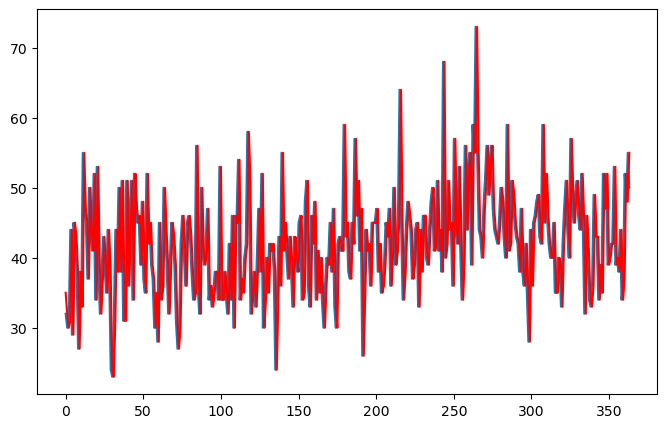

In [74]:
# wykres
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
#biały szum
#jeżeli szereg czasowy okaże się być białym szumem (całkowita losowość) wówczas rozsądna predykcja nie jest możliwa
#błąd predykcji szeregu czasowego powinien być białym szumem, wówczas jesteśmy pewni,
#że model został zbudowany na esencji sygnału
#szereg czasowy nie jest białym szumem jeżeli któreś z poniższych pytań jest prawdziwe:
#1. czy średnia jest niezerowa?
#2. czy wariancja zmienia się w czasie?
#3. czy wartości szeregu korelują ze sobą po przesunięciu o lag?

In [75]:
#przykład białego szumu

from random import gauss
from random import seed

seed(1)
series = [gauss(0.0, 1.0) for i in range(1000)]
series = pd.Series(series)

In [76]:
series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

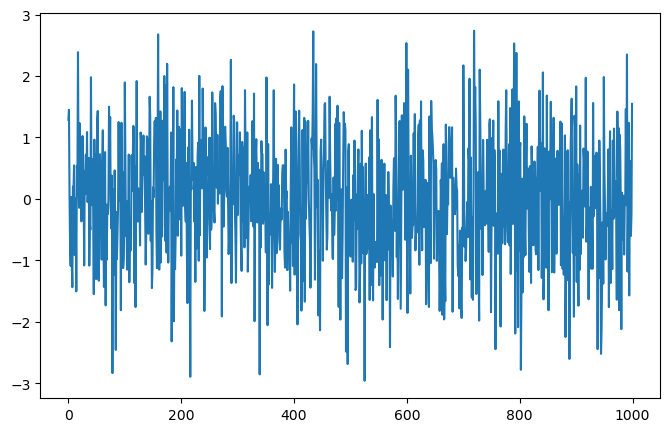

In [77]:
# wykres
series.plot()
plt.show()

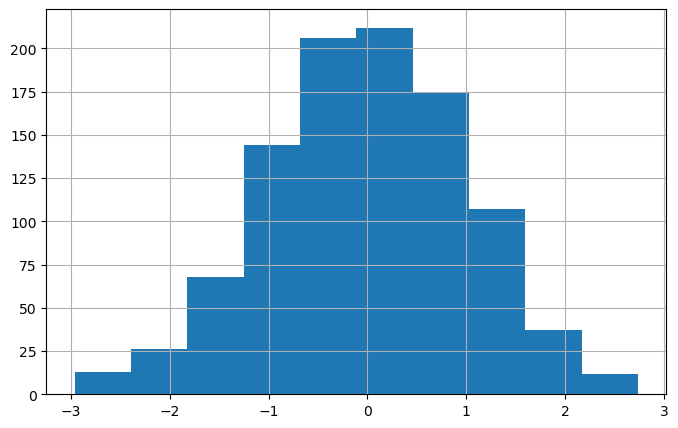

In [78]:
# histogram
series.hist()
plt.show()

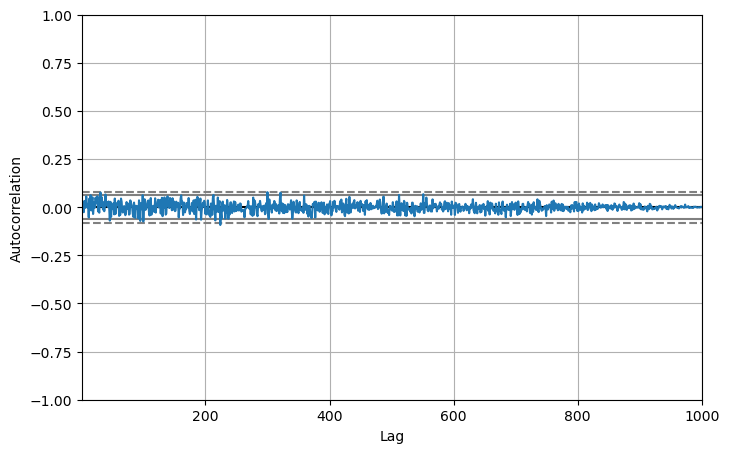

In [79]:
# funkcja autokorelacji
pd.plotting.autocorrelation_plot(series)
plt.show()

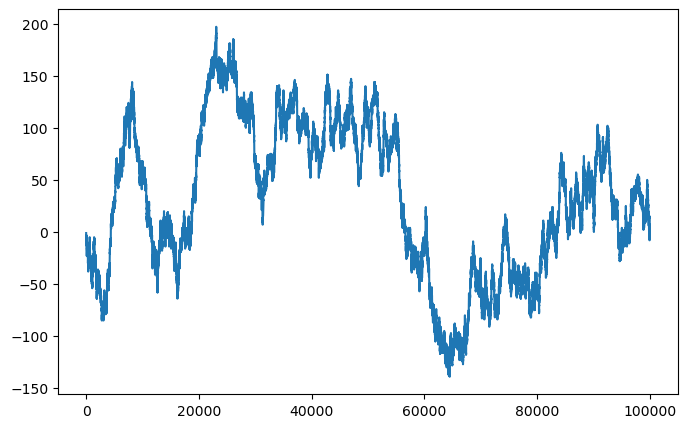

In [83]:
#błądzenie losowe (random walk)
#błądzenie losowe pozwala na zrozumienie przewidywalności szeregu czasowego

# tworzymy i rysujemy przykładowe błądzenie losowe
seed(123)
random_walk = list()
random_walk.append(-1 if rnd.random() < 0.5 else 1)
for i in range(1, 100000):
    movement = -1 if rnd.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
plt.plot(random_walk)
plt.show()

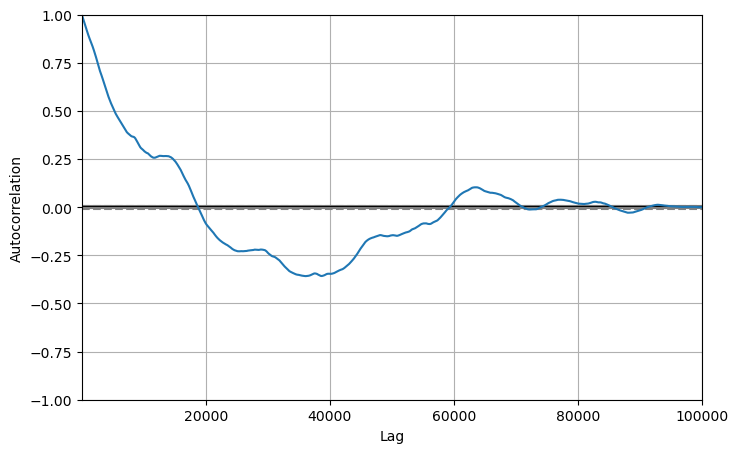

In [84]:
# funkcja autokorelacji (FA) błądzenia losowego
# FA pokazuje, że błądzenie losowe nie jest szeregiem stacjonarnym
pd.plotting.autocorrelation_plot(random_walk)
plt.show()

In [85]:
np.mean(random_walk)

31.62538

In [86]:
# do wiarygodnego sprawdzenia stacjonarności szeregu służy
#rozszerzony test Dickey-Fullera (ADF)
# hipoteza zerowa testu to szereg czasowy jest niestacjonarny
# w wyniku testu dostajemy wartość większą od wszystkich
#krytycznych poziomów ufności
# zatem szereg czasowy jest niestacjonarny
from statsmodels.tsa.stattools import adfuller

result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -31.648359
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [87]:
series = read_csv('dane/daily-total-female-births.csv',
                  header=0,
                  index_col=0, parse_dates=True, squeeze=True)

/tmp/ipykernel_137/2900735684.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/daily-total-female-births.csv',


<Axes: xlabel='Date'>

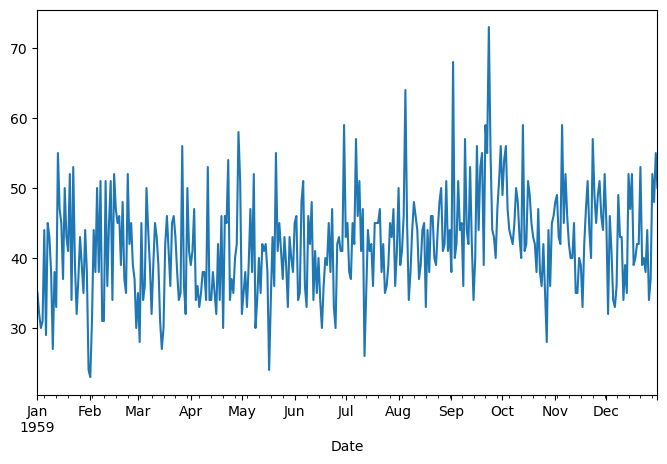

In [88]:
series.plot()

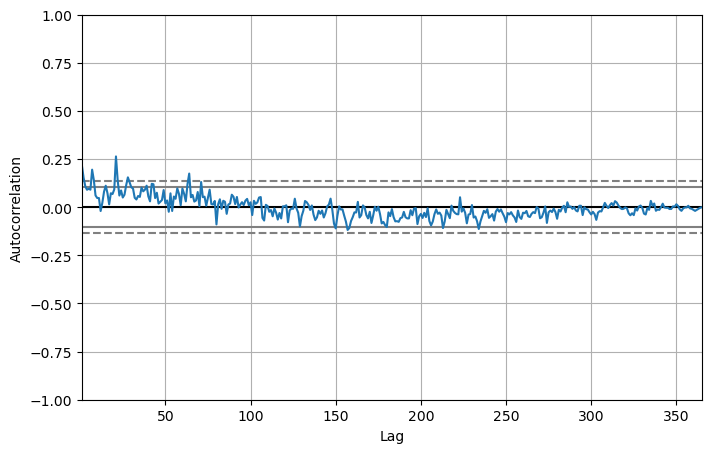

In [89]:
pd.plotting.autocorrelation_plot(series)
plt.show()

In [90]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64

In [92]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [93]:
(series-series.mean()).mean()

-1.8688247296704003e-15

In [ ]:
#z szeregu, który jest błądzeniem losowym możemy stworzyć szereg stacjonarny

#skoro w błądzeniu losowym kolejne wartości zależą od poprzednich, usunięcie tych róźnic stworzy szereg stacjonarny
#szereg nie zawiera teraz żadnych struktur które można wykorzystać w uczeniu maszynowym
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)
# wykres różnic
plt.plot(diff)
plt.show()

In [ ]:
plt.hist(diff)
plt.show()

In [ ]:
#i jeszcze FA
#wyraźnie widać, że korelacje są małe i poniżej 95% i 99% przedziału ufności
pd.plotting.autocorrelation_plot(diff)
plt.ylim(-0.5,0.5)
plt.show()


In [ ]:
plt.plot(random_walk)
plt.show()

In [ ]:
#nie można przeprowadzić rozsądnej predykcji błądzenia losowego
#można jedynie wykonać naiwną predykcję bazując na najbliższych wartościach szeregu t-1 -> t

# dzielimy dane na zbiór uczący i testowy
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# naiwna predykcja uwzględniająca zmianę między kolejnymi
# elementami równą 1
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


In [ ]:
# naiwna predykcja uwzględniająca kierunek i wartość zmiany między kolejnymi elementami równą +/-1
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history + (-1 if rnd.random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

In [94]:
#dekompozycja szeregów czasowych
#szereg czasowy można rozłożyć na dwa główne komponenty
#1. systematyczne - elementy szeregu, które są konsystentne lub
# rekurencyjne i mogą opisane i modelowane
#2. niesystematyczne - elementy szeregu, które nie mogą być
# bezpośrednio modelowane

#Komponenty systematyczne to: poziom (wartość średnia),
# trend (występuje opcjonalnie) i sezonowość (występuje opcjonalnie)
#Komponent niesystematyczny to szum.

#Możemy rozważać dwa modele szeregów czasowych:
#1. addytywne (liniowe): poziom + trend + sezonowość + szum
#2. multiplikatywne (nieliniowe): poziom * trend * sezonowość * szum

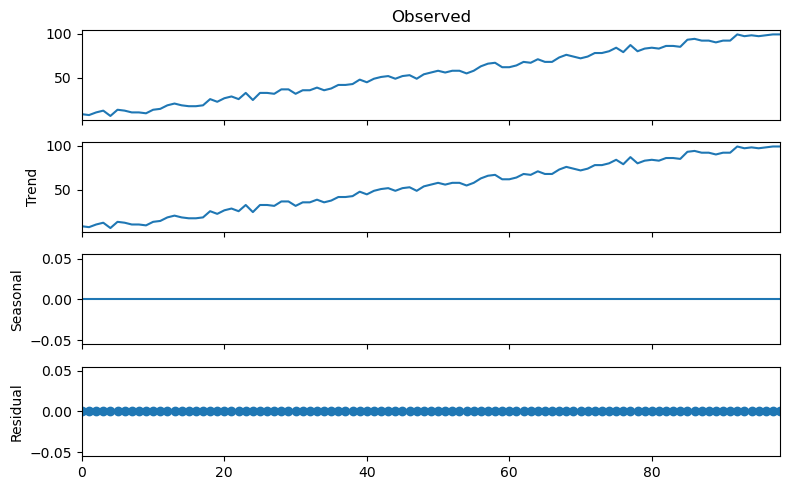

In [96]:
# przykład dekompozycji szeregu czasowego przy założeniu modelu addytywnego

from statsmodels.tsa.seasonal import seasonal_decompose
series = [i + rnd.randrange(10) for i in range(1,100)]
result_add = seasonal_decompose(series, model='additive', period=1)
result_add.plot()
plt.show()

In [97]:
#poszczególne składowe dekompozycji są zapisywane w odpowiednich zmiennych
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

[ 9.  8. 11. 13.  7. 14. 13. 11. 11. 10. 14. 15. 19. 21. 19. 18. 18. 19.
 26. 23. 27. 29. 26. 33. 25. 33. 33. 32. 37. 37. 32. 36. 36. 39. 36. 38.
 42. 42. 43. 48. 45. 49. 51. 52. 49. 52. 53. 49. 54. 56. 58. 56. 58. 58.
 55. 58. 63. 66. 67. 62. 62. 64. 68. 67. 71. 68. 68. 73. 76. 74. 72. 74.
 78. 78. 80. 84. 79. 87. 80. 83. 84. 83. 86. 86. 85. 93. 94. 92. 92. 90.
 92. 92. 99. 97. 98. 97. 98. 99. 99.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0

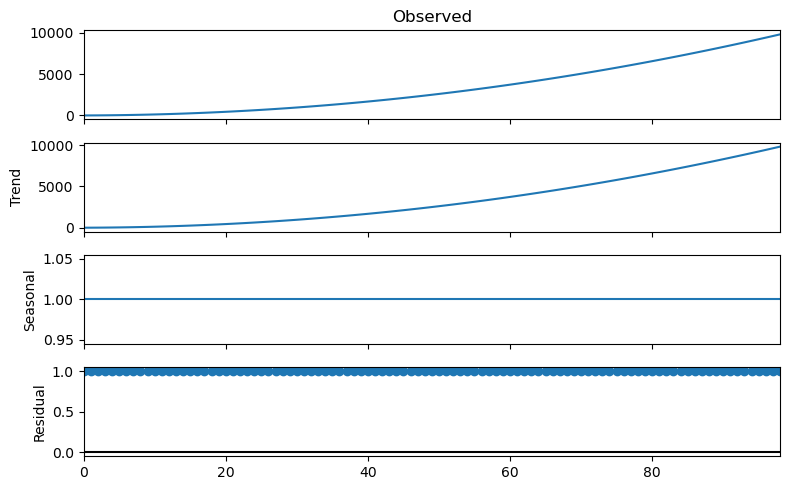

In [99]:
series = [i**2.0 for i in range(1,100)]
result_multi = seasonal_decompose(series, model='multiplicative', period=1)
result_multi.plot()
plt.show()

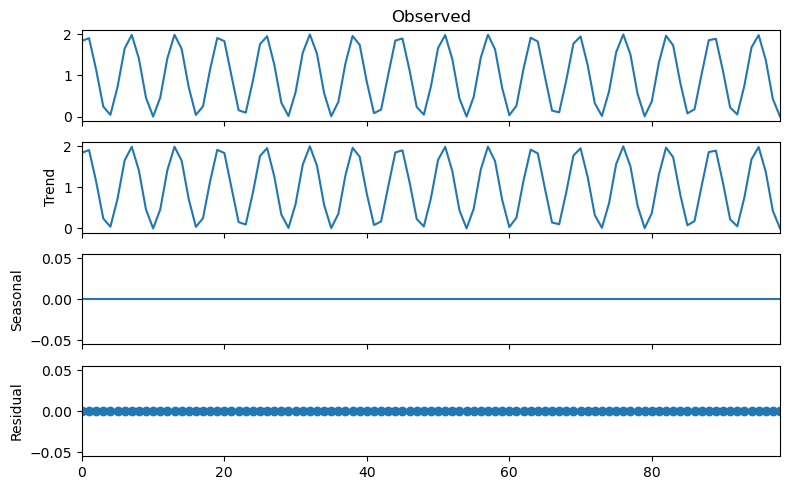

In [101]:
series = [np.sin(i)+1 for i in range(1,100)]
result_multi = seasonal_decompose(series, model='additive', period=1)
result_multi.plot()
plt.show()

/tmp/ipykernel_137/111914078.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dane/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


<Axes: xlabel='Month'>

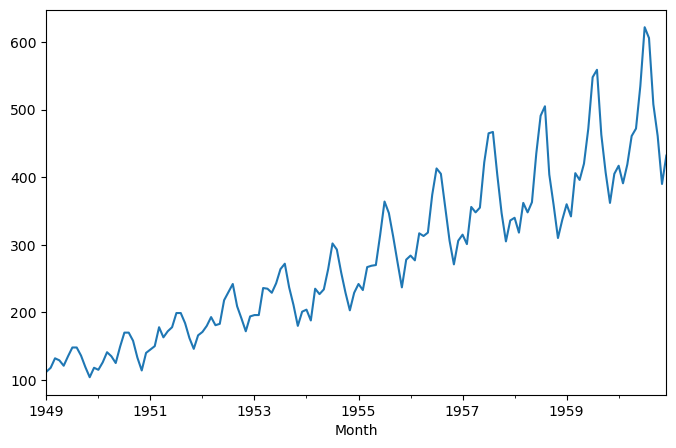

In [102]:
# dekompozycja rzeczywistego szeregu czasowego - model multiplikatywny
series = read_csv('dane/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()

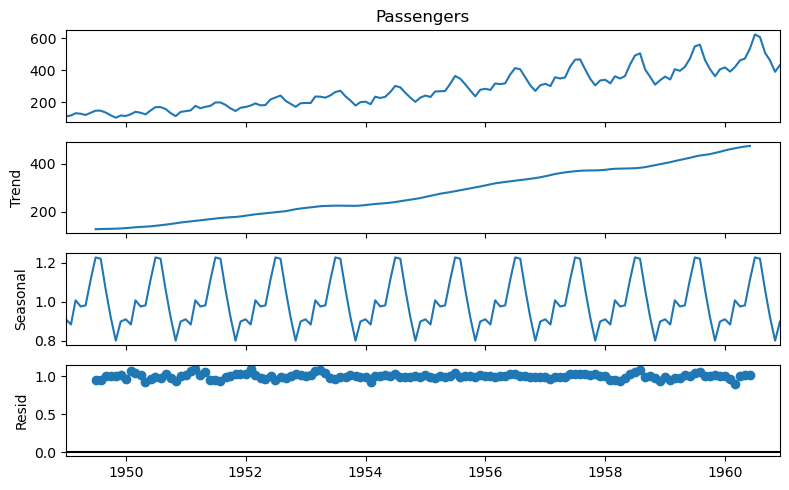

In [103]:
result = seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

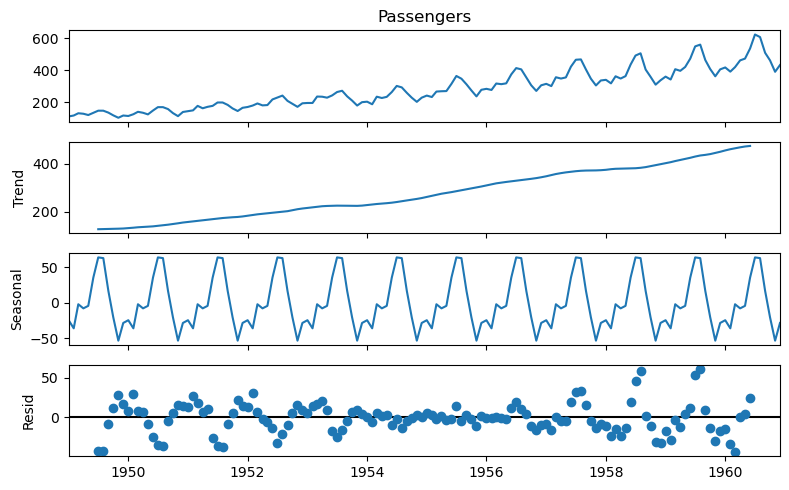

In [104]:
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()

In [105]:
#Usuwanie trendu z szeregu czasowego
#Możemy wyróżnić kilka cech trendów:
#1. Deterministyczne (monotonicznie rosnące lub malejące) 
# i stochastyczne (monotoniczność trendu się zmienia)
#2. Globalne i lokalne

#Szereg czasowy z trendem to szereg niestacjonarny.
#Usunięcie trendu z szeregu czasowego powoduje, że staje się on stacjonarny.

#Z punktu widzenia uczenia maszynowego usunięcie trendu
# zmniejsza zaburzenia pomiędzy danymi wejściowymi i wyjściowymi.
#Z drugiej strony dodanie trendu może poprawić relację pomiędzy predyktorami a zmienną celu.



In [ ]:
#Usuwanie trendu poprzez różnicowanie szeregu czasowego

def parser(x):
    return datetime.strptime('202'+x, '%Y-%m')

series = read_csv('dane/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
X = series.values
print(np.mean(X))

In [ ]:
#trend wznoszący jest wyraźnie widoczny na wykresie
plt.plot(X)
plt.show()

In [ ]:
# tworzymy nową zmienną, która jest różnicą dwóch
# kolejnych wartości szeregu
# new_x(t) = x(t) - x(t-1)
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

print(np.mean(diff))
#plt.plot(X)
plt.plot(diff)
plt.show()

In [ ]:
#Usuwanie trendu poprzez budowanie modelu regresyjnego 

from sklearn.linear_model import LinearRegression

# budujemy model regrsji liniowej
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)

In [ ]:
# wyznaczamy trend liniowy korzystając z modelu
trend = model.predict(X)

# wykres danych i trendu
plt.plot(y)
plt.plot(trend)
plt.show()

In [ ]:
# usuwamy trend 
detrended = [y[i]-trend[i] for i in range(0, len(series))]

# rusujemy dane bez trendu
print(np.mean(detrended))
plt.plot(detrended)
plt.show()

In [ ]:
plt.hist(detrended)
plt.show()

In [ ]:
result = adfuller(detrended)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

In [ ]:
#Wyodrębnianie sezonowości

#Sezonowość może mieć znaczny wpływ na modelowanie szeregów czasowych
#1. Czysty sygnał - usunięcie sezonowości może poprawić związek pomiędzy
#danymi wejściowymi i wyjściowymi
#2. Dodatkowe informacja - sezonowść może stać się kolejnym predyktorem

#Szereg czasowy z usuniętą sezonowością nazywamy sezonowo stacjnarnym.

In [ ]:
#wczytanie danych i wyświetlenie wykresu

series = read_csv('dane/daily-minimum-temperatures.csv', header=0, index_col=0,
                  parse_dates=True, squeeze=True)
plt.plot(series)
plt.show()

In [ ]:
# usunięcie sezonowości poprzez różnicowanie
# dnia w roku do dnia w roku kolejnym
#uwaga na lata przestępne
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()
print(np.mean(diff))

In [ ]:
#może warto rozważyć sezonowść w odstępach miesięcznych
series = read_csv('dane/daily-minimum-temperatures.csv', header=0, index_col=0,
                  parse_dates=True, squeeze=True)
resample = series.resample('M')
monthly_mean = resample.mean()

print(monthly_mean.head(18))
monthly_mean.plot()
plt.show()

In [ ]:
# usunięcie sezonowości poprzez różnicowanie miesiąca
# w roku do miesiąca w roku kolejnym

series = read_csv('dane/daily-minimum-temperatures.csv', header=0, index_col=0,
                  parse_dates=True, squeeze=True)

resample = series.resample('M')
monthly_mean = resample.mean()

X = series.values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean[i] - monthly_mean[i - months_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()
print(np.mean(diff))

In [ ]:
# usunięcie sezonowości poprzez różnicowanie średniej miesięcznej w roku
#do dnia w roku kolejnym

series = read_csv('dane/daily-minimum-temperatures.csv', header=0, index_col=0,
                  parse_dates=True, squeeze=True)
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
    month_mean_last_year = series[month_str].mean()
    value = X[i] - month_mean_last_year
    diff.append(value)

plt.plot(diff)
plt.show()
print(np.mean(diff))

In [ ]:
#podobnie jak trend, sezonowość możemy modelować za pomocą fitowania
#funkcji okresowych (np. sinus lub cosinus) lub wielomianem w ramach sezonu (okresu)

#jeżeli znajdziemy funkcję szacującą sezonowść, możemy jej użyć do predykcji 

# modelowanie sezonowości poprzez wielomian wybranego stopnia - super sprawa!!!
#uwaga na lata przestępne

series = read_csv('dane/daily-minimum-temperatures.csv', header=0, index_col=0,
                  parse_dates=True, squeeze=True)

# znajdujemy wielomian postaci: x^n*b1 + x^(n-1)*b2 + ... + bn dla k

X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = np.polyfit(X, y, degree)
print('Coefficients: %s' % coef)


# wyznaczamy krzywą
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)

# tworzymy wykres porównawczy
plt.plot(series.values)
plt.plot(curve, color='red', linewidth=3)
plt.show()

In [ ]:
#posiadając wymodelowaną sezonowość możemy ją usunąć z szeregu czasowego
#poprzez różnicowanie wartości rzeczywistej i oszacowanej

values = series.values
diff = list()
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)
plt.plot(diff)
plt.show()
print(np.mean(diff))

In [ ]:
np.std(diff)

In [ ]:
plt.hist(diff)
plt.show()

In [ ]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))